# Logistic Regression from Scratch

In this notebook, I will try to implement logistic regression from scratch using nothing besides `numpy`, `make_classification` and `matplotlib`. These three libraries are for matrix handling, data management, and algorithm visualization respectively.

## Import Packages

I think the title does a pretty good job at explaining what's going on here :)

In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification

## Sigmoid Function

This is the core of logistic regression. This sigmoid function takes in any value and returns a corresponding number between 0 and 1 (`[0, 1]`)

In [161]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

## Cost Function

Here, we use the cost function associated with logistic regression in order to calculate the discrepancy between our prediction and label.

In [162]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1 / m) * (((-y).T @ np.log(h + epsilon)) - ((1 - y).T @ np.log(1 - h + epsilon)))
    return cost

## Gradient Descent

Similar to linear regression, we calculate the partial derivative of the cost function and use it to update our weights each iteration.

We multiply the learning rate with the partial derivative of the cost function; the derivative informs us of the direction we should change our variable in.

In [163]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations, 1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

## Prediction

In order to make our prediction, we simply multiply our weights with our features and pass this to our sigmoid unit. Since we want either 0 or 1 and not a decimal in between, we use `np.round` to give us a round number.

In [164]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Generate Data

Here, we make our own dataset with two classes. In order to do this, we use sklearn's make_classification method to produce our feature vector `X` and label column `y`.

Remember, adding a `newaxis` to `y` allows us to turn `y` into a column vector instead of a horizontal one!

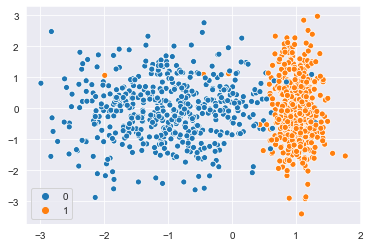

In [165]:
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=1, 
                           n_clusters_per_class=1, random_state = 24)

y = y[:,np.newaxis]

sns.set_style('darkgrid')
sns_plot = sns.scatterplot(X[:,0],X[:,1],hue=y.reshape(-1))
sns_plot.figure.savefig("data.png")

In [166]:
print(f'This dataset has {X.shape[0]} entries with {X.shape[1]} features')
print(f'The shape of X is: {X.shape}\nThe shape of y is: {y.shape}')

This dataset has 1000 entries with 2 features
The shape of X is: (1000, 2)
The shape of y is: (1000, 1)


Now let's combine everything we've made!

The initial cost is: 
[[0.69312718]]
The final cost is: 
[0.12066056]
Optimal parameters are: 
[[-2.06927502]
 [ 5.24444373]
 [ 0.08749649]]



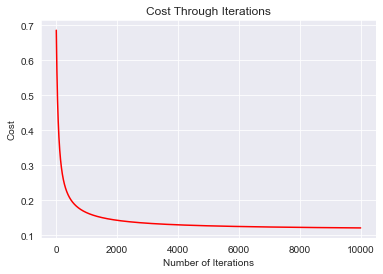

In [167]:
m = len(y)

# add bias term into X
X = np.hstack((np.ones((m, 1)), X))
n = np.size(X, 1)
params = np.zeros((n, 1))

iterations = 10000
learning_rate = 0.03

initial_cost = compute_cost(X, y, params)

print(f'The initial cost is: \n{initial_cost}')

(cost_history, optimal_params) = gradient_descent(X, y, params, learning_rate, iterations)

print(f'The final cost is: \n{cost_history[-1]}')
print(f'Optimal parameters are: \n{optimal_params}\n')

# plot our cost history
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Cost Through Iterations")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.savefig('logistic_cost.png')
plt.show()

## Accuracy Calculation

let's see how accurate our model is!

In [168]:
y_pred = predict(X, optimal_params)
score = float(sum(y_pred == y)) / float(len(y))

print("accuracy:", score)

accuracy: 0.971


Let's visualize the line our algorithm drew!

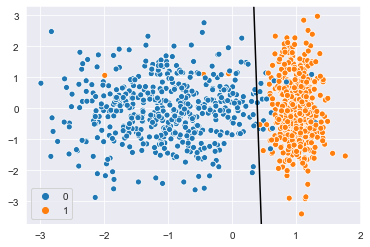

In [170]:
slope = -(optimal_params[1] / optimal_params[2])
intercept = -(optimal_params[0] / optimal_params[2])

sns.set_style('darkgrid')
sns.scatterplot(X[:,1], X[:,2], hue = y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c = "k")
plt.savefig("classification_line.png")